In [1]:
import queue
import numpy as np
import pandas as pd
import networkx as nx
import pydot
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/andrei_c/projects/ds_env/from-scratch/src')

from Ginasty import *
from Fangorn import *

In [3]:
def get_bootstrap_sample_index(X, bootsrap_size=None):
    
    if not bootsrap_size:
        n_sample = X.shape[0]
    else:
        n_sample = round(X.shape[0] * bootsrap_size)
    
    bootstrap_sample_index   = np.random.choice(X.shape[0], n_sample, replace=True)
    out_of_bag_sample_index  =  np.array([i for i in np.arange(X.shape[0]) 
                                             if i not in set(bootstrap_sample_index)])
    
    return bootstrap_sample_index, out_of_bag_sample_index

def make_bootstrap_sample(X, bootsrap_size=None):
    
    bootstrap_index, out_of_bag_index = get_bootstrap_sample_index(X, bootsrap_size)
    
    bootstrap_sample, out_of_bag_sample = X[bootstrap_index, :], X[out_of_bag_index, :]
    
    return bootstrap_sample, out_of_bag_sample

In [7]:
original_sample = pd.read_csv('../data/clf-data.csv').to_numpy()

In [8]:
y_classes_ = np.unique(original_sample[:, -1])

array([0])

In [17]:
n_trees, forest = 10, []
for tree in range(n_trees):
    
    # select how many columns of X will be used by the tree:
    remaining_cols_ = get_col_sample(original_sample, .8)
    remaining_cols_
    
    s, o = make_bootstrap_sample(original_sample)
    
    one_tree = make_tree(s, y_classes_, remaining_cols_, False)
    
    forest.append(one_tree)

In [30]:
s[0:2, :]

array([[7.2, 3.2, 6.0, 1.8, 'Iris-virginica'],
       [6.3, 3.3, 4.7, 1.6, 'Iris-versicolor']], dtype=object)

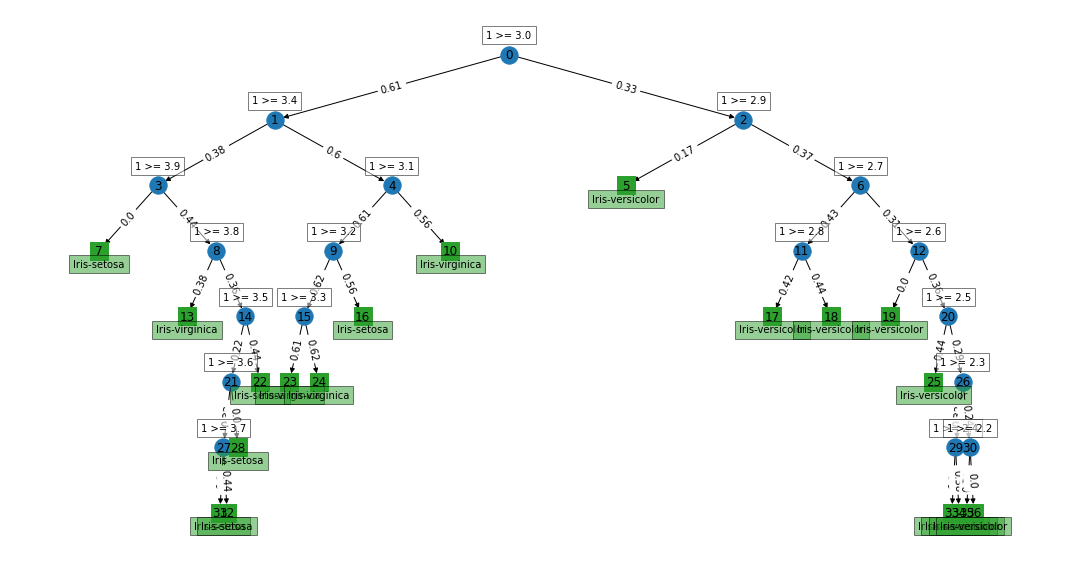

array(['Iris-virginica', 'Iris-virginica'], dtype='<U14')

In [29]:
tree_   = make_tree(s, y_classes_, remaining_cols_, False)
g_tree  = make_tree_as_graph(tree_)
yhat = make_prediciton(tree_, s[0:2, :])[:, 0]
yhat